In [142]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"D:\DZ\Students Performance.csv")
df.shape

(1000, 8)

Деление df на две части

In [145]:
df1=df.iloc[:500,:]
df2=df.iloc[500:,:]

Объединение в один df

In [148]:
pd.concat([df1,df2])

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Поиск дубликатов

In [151]:
df[df.duplicated()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


Поиск пропусков

In [154]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Добавление пропусков

In [157]:
for column in df.columns:
    size = np.random.randint(5,30)
    rows = np.random.randint(0, df.shape[0], size = size)
    df.loc[rows,column] = np.nan
df.isna().sum()

gender                         16
race/ethnicity                 22
parental level of education    18
lunch                          22
test preparation course        20
math score                     20
reading score                  11
writing score                  27
dtype: int64

Заполнение пропусков

In [160]:
na_mindex = df[df['math score'].isna()].index
na_rindex = df[df['reading score'].isna()].index
na_windex = df[df['writing score'].isna()].index
mean_math = df['math score'].mean()
df.loc[na_mindex,'math score']=df.loc[na_mindex,'math score'].fillna(mean_math)
mean_read = df['reading score'].mean()
df.loc[na_rindex,'reading score']=df.loc[na_rindex,'reading score'].fillna(mean_math)
mean_wr = df['writing score'].mean()
df.loc[na_windex,'writing score']=df.loc[na_windex,'writing score'].fillna(mean_math)
gender_mode = df['gender'].mode().values[0]
df['gender'] = df['gender'].fillna(gender_mode)
race_mode = df['race/ethnicity'].mode().values[0]
df['race/ethnicity'] = df['race/ethnicity'].fillna(race_mode)
prt_mode = df['parental level of education'].mode().values[0]
df['parental level of education'] = df['parental level of education'].fillna(prt_mode)
lnh_mode = df['lunch'].mode().values[0]
df['lunch'] = df['lunch'].fillna(lnh_mode)
test_mode = df['test preparation course'].mode().values[0]
df['test preparation course'] = df['test preparation course'].fillna(test_mode)
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Проверка на выбросы

In [163]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.086735,69.153954,67.914342
std,15.002223,14.542942,14.941980
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.086735,70.000000,68.000000
75%,76.000000,79.000000,78.000000
max,100.000000,100.000000,100.000000


<Axes: >

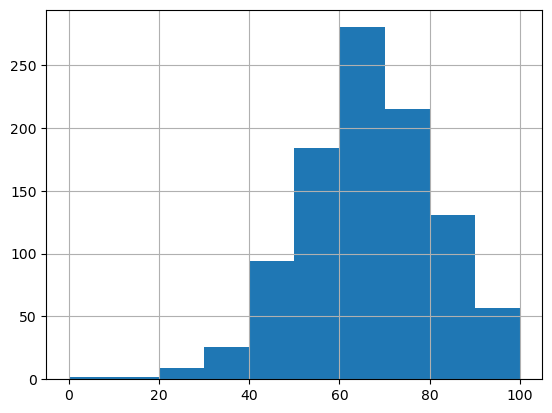

In [165]:
df['math score'].hist()

In [167]:
mu = df['math score'].mean()
sigma = df['math score'].std()
lb = mu - 3*sigma
ub = mu + 3*sigma
df[(df['math score']<=lb)|(df['math score']>=ub)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18.0,32.0,28.0
59,female,group C,some high school,free/reduced,none,0.0,17.0,10.0
787,female,group B,some college,standard,none,19.0,38.0,32.0
980,female,group B,high school,free/reduced,none,8.0,24.0,23.0


Присутствуют выбросы, но удаление невозможно, поскольку численные показатели в других столбцах имеют существенные значения



Стандартизация данных

In [174]:
df['math score'] = (df['math score'] - df['math score'].mean())/df['math score'].std()
df['reading score'] = (df['reading score'] - df['reading score'].mean())/df['reading score'].std()
df['writing score'] = (df['writing score'] - df['writing score'].mean())/df['writing score'].std()
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,3.941593e-01,0.195699,0.407286
1,female,group C,some college,standard,completed,-9.472499e-16,1.433413,1.344243
2,female,group B,master's degree,standard,none,1.593981e+00,1.777223,1.678871
3,male,group A,associate's degree,free/reduced,none,-1.272260e+00,-0.835729,-1.600480
4,male,group C,some college,standard,none,6.607864e-01,0.608271,0.474211
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,1.460668e+00,2.052270,1.812722
996,male,group C,high school,free/reduced,none,-2.724086e-01,-0.973252,-0.864299
997,female,group C,high school,standard,completed,-4.723790e-01,0.126938,-0.195044
998,female,group D,some college,standard,completed,-9.472499e-16,0.608271,0.608063
